In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
feat_trunc_res_cnt_df = pd.read_pickle("./pykF_trunc_res_cnt_df.pkl")
feat_trunc_res_cnt_df

,0
ATP binding site,13
Magnesium binding site,6
N6-acetyllysine site,71
Potassium binding site,8
PykF subunit interface,473
Substrate binding site,15
Transition state stabilizer,3


In [3]:
pykF_feat_mut_eff_cnt_df = pd.read_pickle("./pykF_feat_mut_eff_cnt_df.pkl")
pykF_feat_mut_eff_cnt_df.head()

,functionally disruptive,structurally disruptive,unknown,total
Substrate binding site,4,0,2,6
N6-acetyllysine site,2,1,0,3
ATP binding site,2,1,0,3
Potassium binding site,1,1,0,2
Magnesium binding site,2,1,0,3


Text(0, 0.5, 'nearest feature to\nmutated residue')

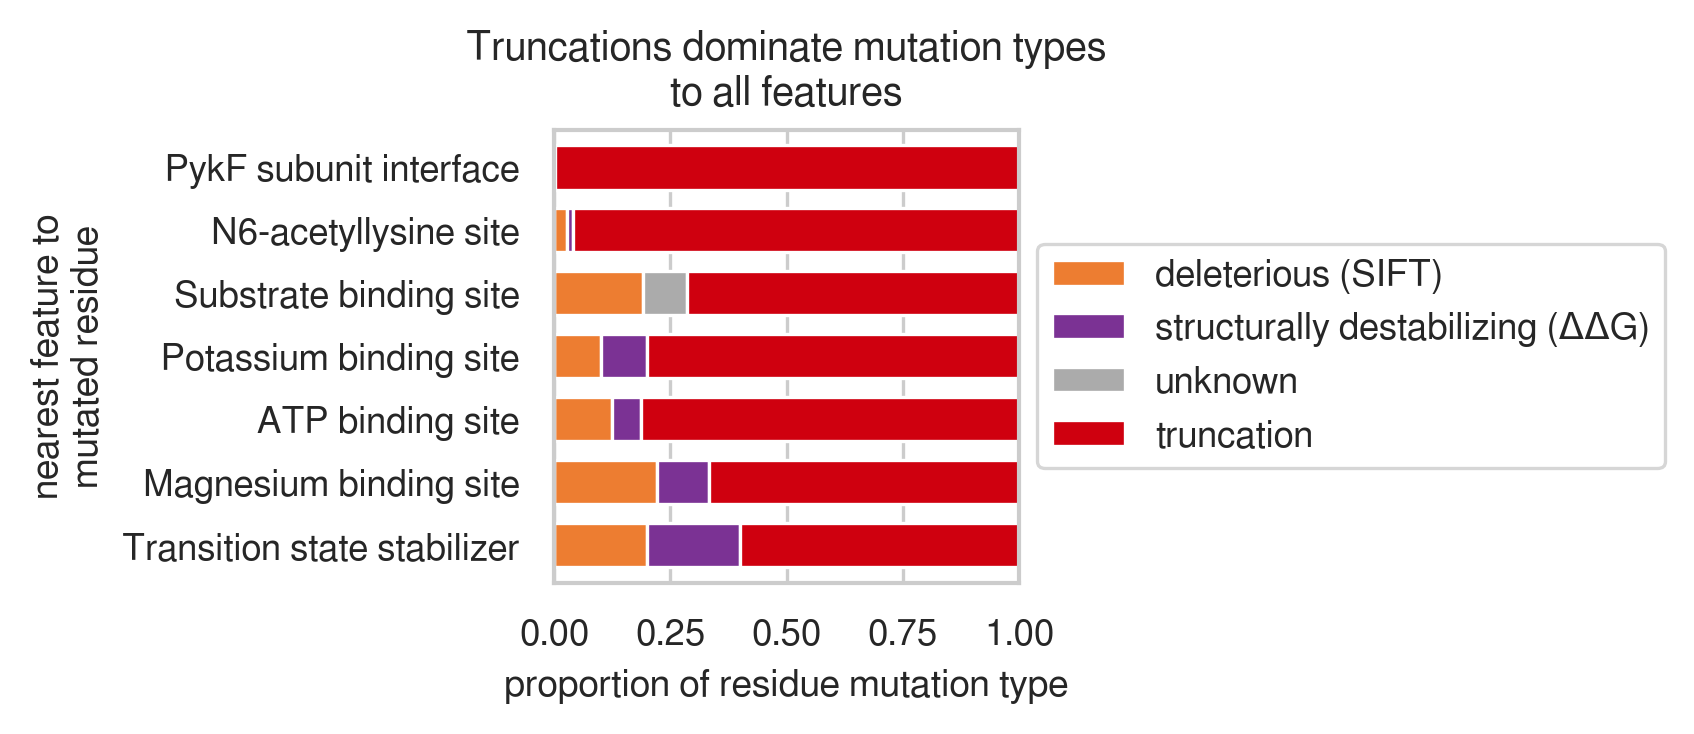

In [4]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns


df = pykF_feat_mut_eff_cnt_df.copy()  # below cells use the original total
df = df.drop(columns="total")
df["coding disruptive"] = 0
for f, r in feat_trunc_res_cnt_df.iterrows():
    if f not in df.index:
        srs = pd.Series({"functionally disruptive": 0, "structurally disruptive": 0,
                         "unknown": 0, "coding disruptive": r[0]}, name=f)
        df = df.append(srs)
    else:
        df.at[f, "coding disruptive"] += r[0]
df["total"] = df.sum(axis=1)
df = df.rename(columns={
    "functionally disruptive": "deleterious (SIFT)",
    "structurally disruptive": "structurally destabilizing (ΔΔG)",
    "coding disruptive": "truncation",
})
# display(df)

prop_df = df.copy()
prop_df = prop_df.astype(float)
for c in prop_df.columns:
    for r in prop_df.index:
        prop_df.at[r, c] = df.at[r, c]/df.at[r, "total"]
# prop_df

%matplotlib inline
plt.rcParams["figure.dpi"] = 300
sns.set_palette("deep")
sns.set_context("paper")
# sns.set_style("ticks")
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ["FreeSans"]

df = prop_df.copy()
df = df.sort_values(by="total")
df = df.drop(columns=["total"])

# manually sorting to be the same order as the final plot in this NB
df = df.T[["Transition state stabilizer",
         "Magnesium binding site",
         "ATP binding site",
         "Potassium binding site",
         "Substrate binding site",
         "N6-acetyllysine site",
         "PykF subunit interface"]]
df = df.T

ax = df.plot.barh(
    color=["#ED7D31", "#7B3294", "#ABABAB", "#CF000F"],
    figsize=(2, 2),
    stacked=True,  # Can do stacked since this is the proportion of mutation types and not proportion of mutations
    width=0.7,
)

# sns.despine(ax=ax, top=True, right=True, left=True, bottom=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.xscale('log')
# ax.tick_params(axis='y', which='major', length=0)
# ax.get_xaxis().set_visible(False)

for tick in ax.get_xticklabels():
    tick.set_fontname("FreeSans")
for tick in ax.get_yticklabels():
    tick.set_fontname("FreeSans")

# df = df.reset_index()  # Resetting index for the below annotations to work
# for i, r in df.iterrows():
#     s = str(int(r["total"]))
#     ax.text(r["total"], i-0.3,  s, fontname="FreeSans", fontsize=12)


# ax.tick_params(axis='both', which='both', length=0)
# ax.set_xticklabels([])
ax.set_xlabel('proportion of residue mutation type',
              fontname="FreeSans", fontsize=9)
# ax.xaxis.labelpad = -2
ax.set_ylabel('', fontname="FreeSans")
plt.xlim(0, 1)
ax.grid(axis='y', linewidth=0)
ax.set_title("Truncations dominate mutation types\nto all features")
ax.set_ylabel('nearest feature to\nmutated residue',
              fontname="FreeSans", fontsize="9")

In [5]:
gene_mut_res_df = pd.read_pickle("./PykF_mut_res_df.pkl")
gene_mut_res_df = gene_mut_res_df.reset_index(drop=True)
gene_mut_res_df.head()

,mutated AA,functionally disruptive,structurally disruptive,nearest feature,unknown
0,278,True,False,Substrate binding site,False
1,309,True,False,Substrate binding site,False
2,314,True,False,N6-acetyllysine site,False
3,129,True,True,ATP binding site,False
4,174,True,True,Potassium binding site,False


In [6]:
from collections import Counter
d = Counter(gene_mut_res_df["nearest feature"])

# Include truncations
for feat, r in feat_trunc_res_cnt_df.iterrows():
    if r[0] != 0:
        d[feat] += r[0]

# To make it easier to turn into a DF
d2 = dict()
for k, v in d.items():
    d2[k] = [v]
full_cnt_df = pd.DataFrame(d2).T
full_cnt_df

,0
Substrate binding site,21
N6-acetyllysine site,73
ATP binding site,15
Potassium binding site,9
Magnesium binding site,8
PykF subunit interface,474
Transition state stabilizer,4


In [7]:
# mut_aa_feat_prox_df = pd.read_pickle("./mut_aa_feat_prox_df.pkl")
# mut_aa_feat_prox_df.head()

In [8]:
# feat_hit_cnt = feat_trunc_res_cnt_df.copy()
# for _, r in mut_aa_feat_prox_df.iterrows():
#     feat_hit_cnt.at[r["nearest feature"], 0] += 1

# feat_hit_cnt = feat_hit_cnt.rename(columns={0: "all"})
# feat_hit_cnt

In [9]:
# feat_hit_cnt = feat_trunc_res_cnt_df.copy()
# for f, r in non_trunc_aa_mut_effect_df.iterrows():
#     feat_hit_cnt.at[f, "nearest feature"] += r["total"]
# feat_hit_cnt

In [10]:
# feat_hit_cnt = feat_trunc_res_cnt_df.copy()
# for f, r in pykF_mut_nearest_feat_df.iterrows():
#     feat_hit_cnt.at[f, 0] += r["total"]
# feat_hit_cnt

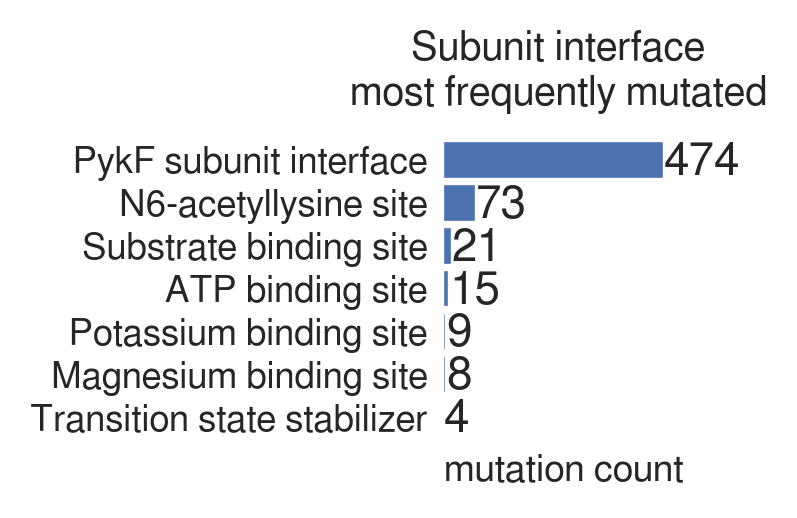

In [11]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
sns.set_palette("deep")
sns.set_context("paper")
sns.set_style("ticks")
plt.rcParams['font.sans-serif'] = ["FreeSans"]

df = full_cnt_df.copy()
df = df.sort_values(by=0)
ax = df.plot.barh(
    stacked=True,
#     color=colors,
    figsize=(1, 1.4),
    width=0.90,
)

sns.despine(ax=ax, top=True, right=True, bottom=True, left=True)
ax.get_legend().remove()
# plt.xscale('log')
ax.tick_params(axis='y', which='major', length=0)
# ax.get_xaxis().set_visible(False)

df = df.reset_index()  # Resetting index for the below annotations to work
for i, r in df.iterrows():
    s = r[0]
    ax.text(r[0], i-0.35, s, fontname="FreeSans", fontsize=11)

ax.set_title("Subunit interface\nmost frequently mutated", fontname="FreeSans")

ax.tick_params(axis='both', which='both', length=0)
ax.set_xticklabels([])
ax.set_xlabel('mutation count', x=0.525, fontname="FreeSans", fontsize=9)
ax.set_ylabel('', fontname="FreeSans", fontsize="8")
ax.xaxis.labelpad = -2

In [12]:
# isobutyric_pykF_mut_nearest_feat_df = pd.read_pickle("./isobutyric_acid_pykF_mut_nearest_feat_df.pkl")
# isobutyric_pykF_mut_nearest_feat_df

In [13]:
PykF_IBUA_mut_res_df = pd.read_pickle("./PykF_IBUA_mut_res_df.pkl")
PykF_IBUA_mut_res_df = PykF_IBUA_mut_res_df.reset_index(drop=True)
PykF_IBUA_mut_res_df.head()

,mutated AA,functionally disruptive,structurally disruptive,nearest feature,unknown
0,314,True,False,N6-acetyllysine site,False
1,129,True,True,ATP binding site,False
2,174,True,True,Potassium binding site,False
3,246,True,False,Magnesium binding site,False
4,246,True,False,Substrate binding site,False


In [14]:
pykF_IBUA_feat_trunc_res_cnt_df = pd.read_pickle("./pykF_IBUA_trunc_feat_res_cnt_df.pkl")
pykF_IBUA_feat_trunc_res_cnt_df

,0
ATP binding site,6
Magnesium binding site,2
N6-acetyllysine site,20
Potassium binding site,4
PykF subunit interface,125
Substrate binding site,6
Transition state stabilizer,1


In [15]:
from collections import Counter
d = Counter(PykF_IBUA_mut_res_df["nearest feature"])

# Include truncations
for feat, r in pykF_IBUA_feat_trunc_res_cnt_df.iterrows():
    if r[0] != 0:
        d[feat] += r[0]

# To make it easier to turn into a DF
d2 = dict()
for k, v in d.items():
    d2[k] = [v]
cnt_df = pd.DataFrame(d2).T
cnt_df

,0
N6-acetyllysine site,21
ATP binding site,7
Potassium binding site,5
Magnesium binding site,3
Substrate binding site,7
PykF subunit interface,125
Transition state stabilizer,1


In [16]:
full_cnt_df = full_cnt_df.rename(columns={0:"all"})
full_cnt_df["isobutyric acid tolerance"] = 0
for f, r in full_cnt_df.iterrows():
    if f in cnt_df.index:
        full_cnt_df.at[f, "isobutyric acid tolerance"] += cnt_df.at[f, 0]
#     if f in isobutyric_pykF_mut_nearest_feat_df.index:
#         feat_hit_cnt.at[f, "isobutyric acid tolerance"] += isobutyric_pykF_mut_nearest_feat_df.at[f, "total"]
#     if f in pykF_IBUA_feat_trunc_res_cnt_df.index:
#         feat_hit_cnt.at[f, "isobutyric acid tolerance"] += pykF_IBUA_feat_trunc_res_cnt_df.at[f, 0]
full_cnt_df

,all,isobutyric acid tolerance
Substrate binding site,21,7
N6-acetyllysine site,73,21
ATP binding site,15,7
Potassium binding site,9,5
Magnesium binding site,8,3
PykF subunit interface,474,125
Transition state stabilizer,4,1


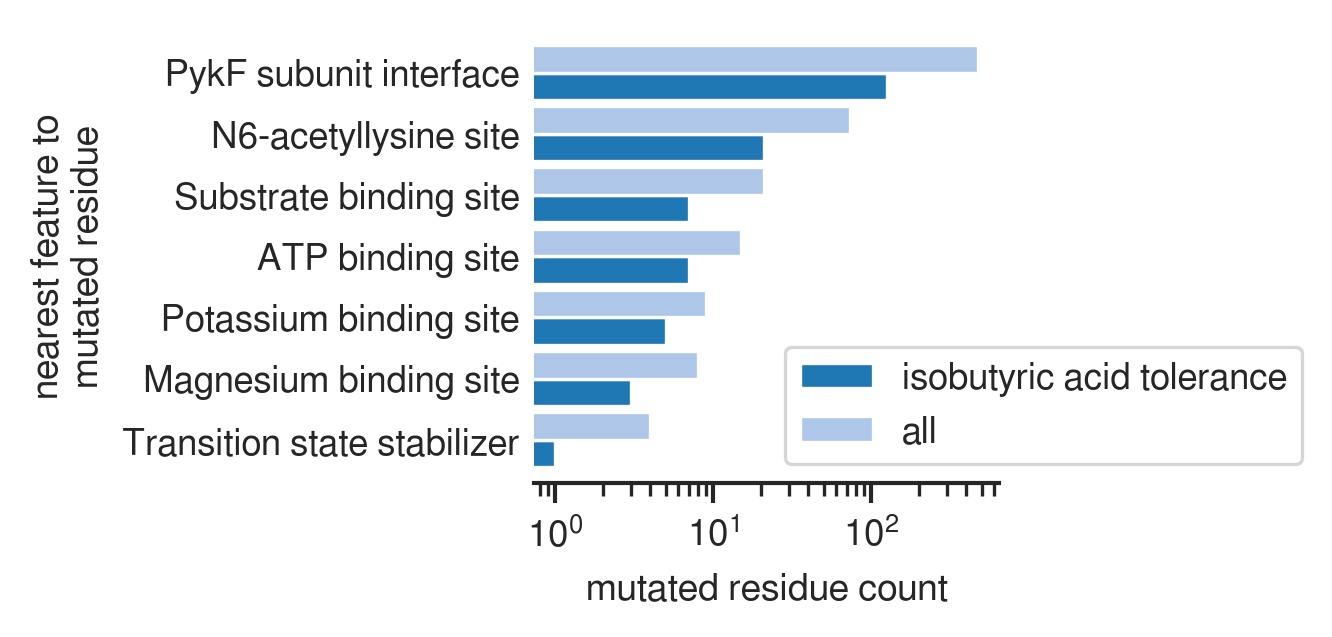

In [18]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
sns.set_palette("tab20")
sns.set_context("paper")
sns.set_style("ticks")
plt.rcParams['font.sans-serif'] = ["FreeSans"]

df = full_cnt_df.copy()
df = df.sort_values(by="all")
df = df[["isobutyric acid tolerance", "all"]]
ax = df.plot.barh(
#     stacked=True,
#     color=colors,
    figsize=(2, 2),
    width=0.90,
)

sns.despine(ax=ax, top=True, right=True, bottom=False, left=True)
# ax.get_legend().remove()
plt.xscale('log')
ax.tick_params(axis='y', which='major', length=0)
# ax.get_xaxis().set_visible(False)

# df = df.reset_index()  # Resetting index for the below annotations to work
# for i, r in df.iterrows():
#     s = r["all"]
#     ax.text(r["all"], i-0.35, s, fontname="FreeSans", fontsize=11)

# ax.set_title("Isobutyric acid tolerance follows\nthe same trend as all mutations to PykF", fontname="FreeSans")

ax.tick_params(axis='y', which='both', length=0)
# ax.set_xticklabels([])
ax.set_xlabel('mutated residue count',
#               x=0.525,
              fontname="FreeSans", fontsize=9)
ax.set_ylabel('nearest feature to\nmutated residue', fontname="FreeSans", fontsize="9")
# ax.xaxis.labelpad = -2
# ax.legend(bbox_to_anchor=(0.1, 0.4))
ax.legend(loc='lower left'
          , bbox_to_anchor=(0.5, 0)
         )